In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
#statistic of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

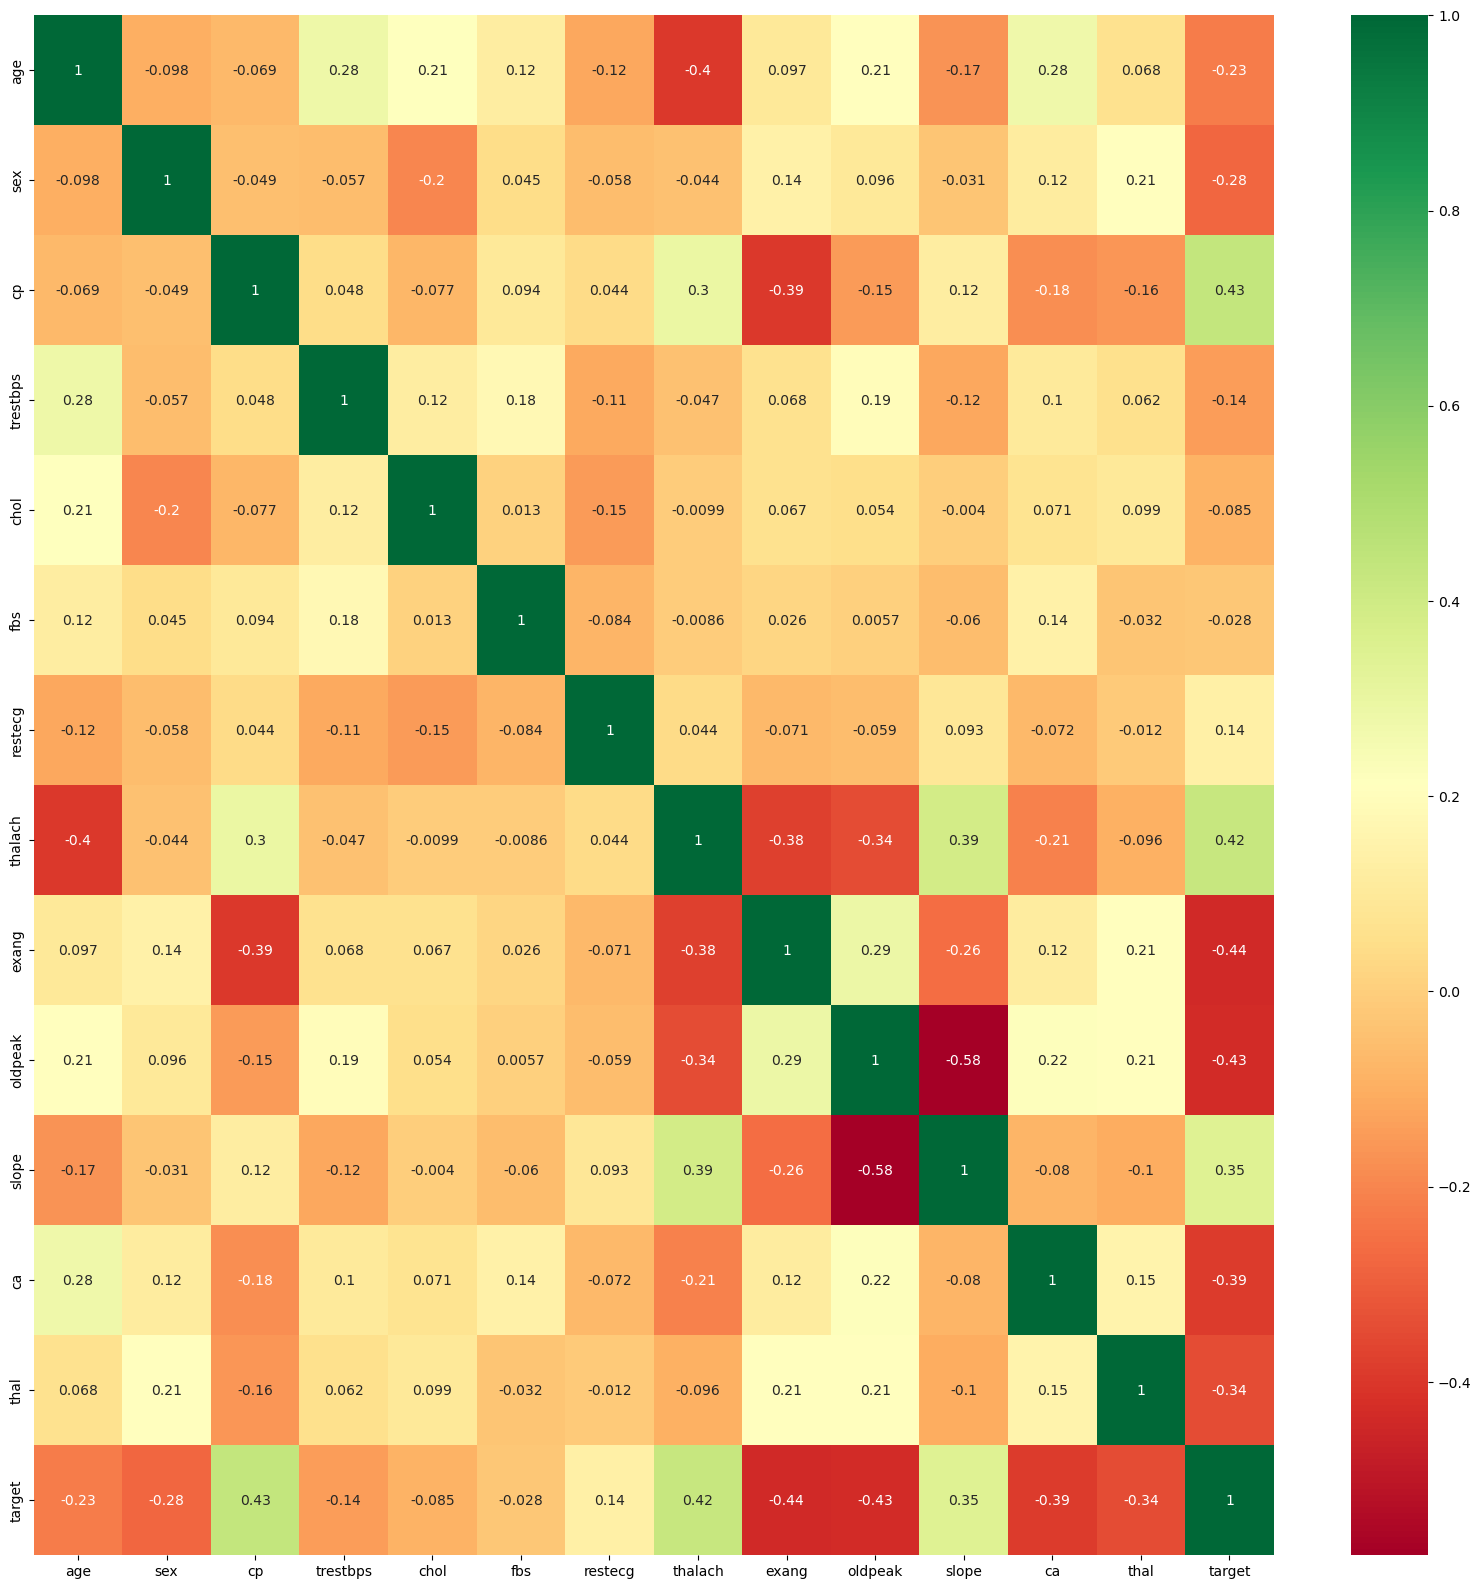

In [7]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Data Transformation 

In [8]:
df_heart = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [9]:
df_heart.replace({
    'sex': {0: 'Female', 1: 'Male'},
    'chest_pain_type': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'},
    'fasting_blood_sugar': {0: '<=120mg/ml', 1: '>120mg/ml'},
    'resting_electrocardiogram': {0: 'Normal', 1: 'Abnormality', 2: 'Left Ventricular Hypertrophy'},
    'exercise_induced_angina': {0: 'No', 1: 'Yes'},
    'st_slope': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'thalassemia': {1: 'Fixed Defect', 2: 'Normal', 3: 'Reversable defect'}
}, inplace=True)

In [11]:
df_heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,Male,Asymptomatic,145,233,>120mg/ml,Normal,150,No,2.3,Upsloping,0,Fixed Defect,1
1,37,Male,Non-Anginal Pain,130,250,<=120mg/ml,Abnormality,187,No,3.5,Upsloping,0,Normal,1
2,41,Female,Atypical Angina,130,204,<=120mg/ml,Normal,172,No,1.4,Downsloping,0,Normal,1
3,56,Male,Atypical Angina,120,236,<=120mg/ml,Abnormality,178,No,0.8,Downsloping,0,Normal,1
4,57,Female,Typical Angina,120,354,<=120mg/ml,Abnormality,163,Yes,0.6,Downsloping,0,Normal,1


# Data Visualization

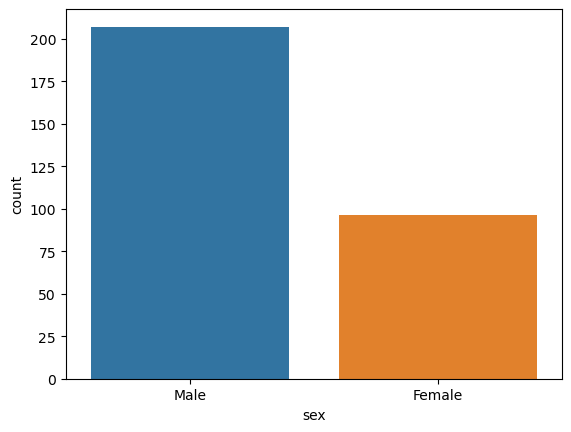

In [11]:
ax = sns.countplot(x='sex',data=df_heart)
plt.show()

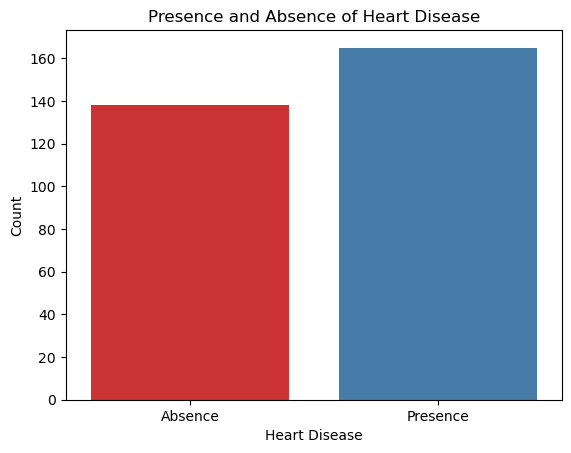

In [12]:
# Bar plot for target {heart disease}
ax = sns.countplot(x='target', data=df_heart, palette='Set1')
ax.set_title('Presence and Absence of Heart Disease')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count')
target_labels = {0: 'Absence', 1: 'Presence'}
ax.set_xticklabels([target_labels[tick] for tick in ax.get_xticks()])
plt.show()

In [13]:
proportions = df_heart['target'].value_counts(normalize=True)

# Print the proportions
print(proportions)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64


C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


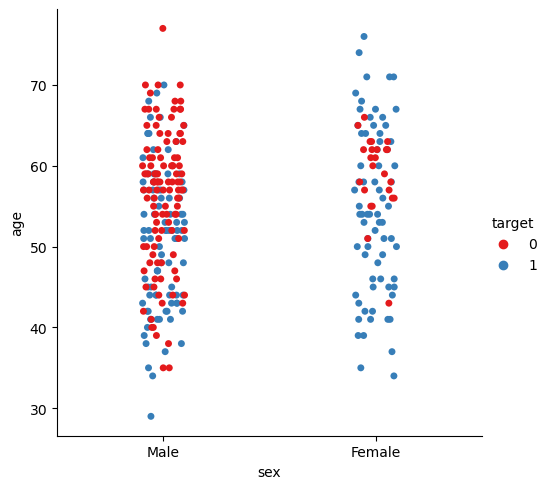

In [14]:
sns.catplot(data=df_heart, x='sex', y='age',  hue='target', palette='Set1')
plt.show()

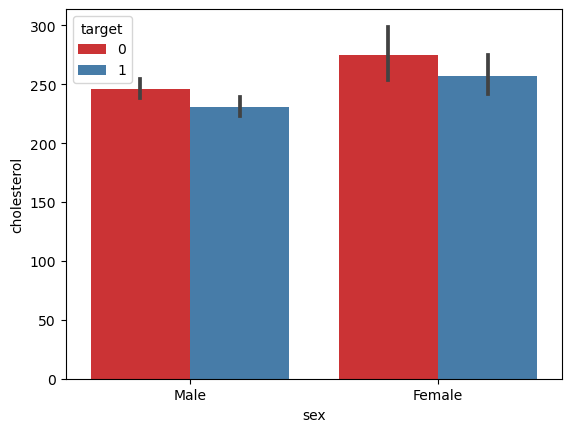

In [15]:
sns.barplot(data=df_heart, x='sex', y='cholesterol', hue='target', palette='Set1')
plt.show()

C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


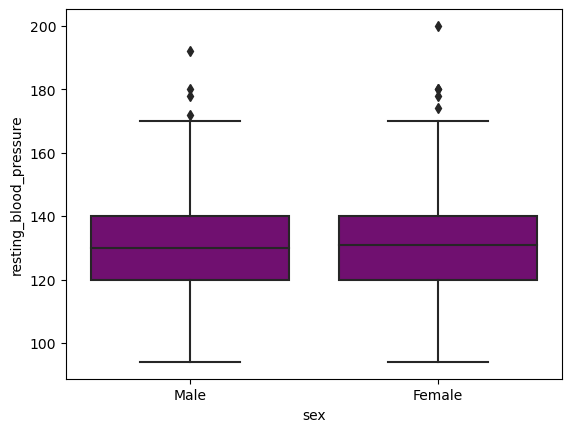

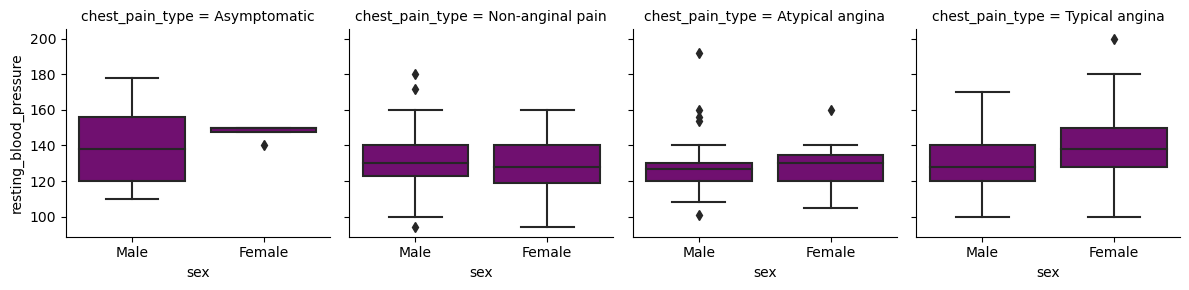

In [19]:
sns.boxplot(x='sex', y='resting_blood_pressure', data=df_heart, palette=['purple'])
plt.xlabel('sex')
plt.ylabel('resting_blood_pressure')
g = sns.FacetGrid(df_heart, col='chest_pain_type')
g.map(sns.boxplot, 'sex', 'resting_blood_pressure', order=['Male', 'Female'], palette=['purple'])
plt.show()

C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


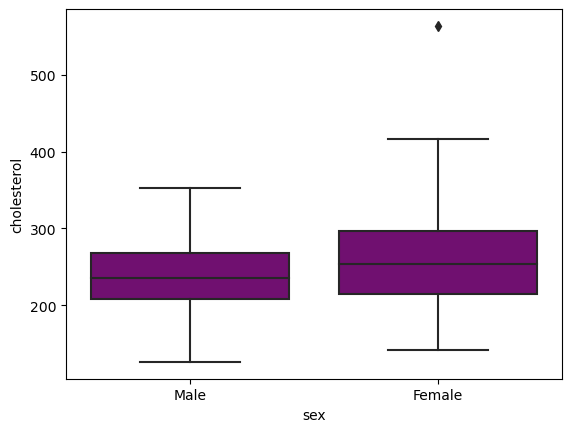

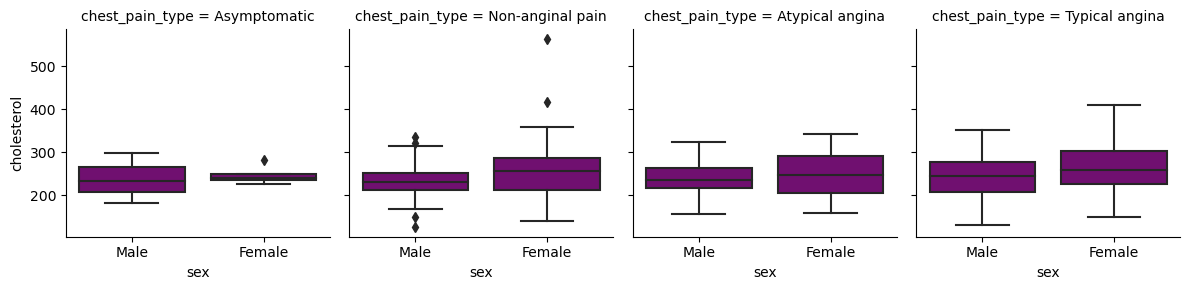

In [20]:
sns.boxplot(x='sex', y='cholesterol', data=df_heart, palette=['purple'])
plt.xlabel('sex')
plt.ylabel('cholesterol')
g = sns.FacetGrid(df_heart, col='chest_pain_type')
g.map(sns.boxplot, 'sex', 'cholesterol', order=['Male', 'Female'], palette=['purple'])
plt.show()